# Objetivo

Analizar la base de datos **dataset_SCL.csv** que contiene información de los vuelos, en el dataset se encuentran las siguiente columnas con su descripción:

| Variable | Descripción |
| :- | :- |
| **Fecha-I**  | Fecha y hora programada del vuelo.
| **Vlo-I** | Número de vuelo programado.
| **Ori-I** | Código de ciudad de origen programado.
| **Des-I** | Código de ciudad de destino programado.
| **Emp-I** | Código aerolínea de vuelo programado.
| **Fecha-O** | Fecha y hora de operación del vuelo.
| **Vlo-O** | Número de vuelo de operación del vuelo.
| **Ori-O** | Código de ciudad de origen de operación.
| **Des-O** | Código de ciudad de destino de operación.
| **Emp-O** | Código aerolínea de vuelo operado.
| **DIA** | Día del mes de operación del vuelo.
| **MES** | Número de mes de operación del vuelo.
| **AÑO** | Año de operación del vuelo.
| **DIANOM** | Día de la semana de operación del vuelo.
| **TIPOVUELO** | Tipo de vuelo, I = Internacional, N = Nacional
| **OPERA** | Nombre de aerolínea que opera.
| **SIGLAORI** | Nombre de ciudad de origen.
| **SIGLADES** | Nombre ciudad destino.

In [1]:
# Librerías a utilizar
import os
import pandas as pd
import numpy as np
from datetime import datetime

# Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

# Estadístico para la normalidad
from scipy.stats import shapiro

# Preprocesamiento de variables categóricas
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
# Cambio de directorio
os.chdir("..")

In [3]:
from utilities import *

In [67]:
path_save_synthetic_features = "data/synthetic_features.csv"
path_load_scl = "data/dataset_SCL.csv"

In [4]:
# Lectura de la data
df_scl = pd.read_csv(path_load_scl)

In [5]:
# Normalización de las columnas
df_scl.columns = [col.upper().replace("-","_") for col in df_scl.columns]
df_scl = df_scl.rename({"AÑO":"YEAR"},axis=1)

In [6]:
# Revisar cantidad de filas y columnas del dataset
df_scl.shape

(68206, 18)

In [7]:
df_scl.head()

,FECHA_I,VLO_I,ORI_I,DES_I,EMP_I,FECHA_O,VLO_O,ORI_O,DES_O,EMP_O,DIA,MES,YEAR,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [8]:
resume_col(df=df_scl,col="TIPOVUELO")

,TIPOVUELO,CONTEO,PORCENTAJE
0,N,36966,54.198%
1,I,31240,45.802%


In [9]:
resume_col(df=df_scl,col="DES_I")

,DES_I,CONTEO,PORCENTAJE
0,SCFA,5787,8.485%
1,SPJC,5270,7.727%
2,SCCF,5145,7.543%
3,SCTE,4357,6.388%
4,SCIE,3995,5.857%
...,...,...,...
59,SBFI,1,0.001%
60,SPSO,1,0.001%
61,SEQU,1,0.001%
62,SEQM,1,0.001%


In [41]:
resume_col(df=df_scl,col="DES_O")

,DES_O,CONTEO,PORCENTAJE
0,SCFA,5786,8.483%
1,SPJC,5270,7.727%
2,SCCF,5146,7.545%
3,SCTE,4357,6.388%
4,SCIE,3993,5.854%
...,...,...,...
58,SEQM,2,0.003%
59,KIAD,1,0.001%
60,SPSO,1,0.001%
61,EGYP,1,0.001%


In [10]:
resume_col(df=df_scl,col="EMP_I")

,EMP_I,CONTEO,PORCENTAJE
0,LAN,37611,55.143%
1,SKU,14298,20.963%
2,TAM,3049,4.47%
3,ARG,1949,2.858%
4,CMP,1850,2.712%
5,LAW,1574,2.308%
6,AVA,1152,1.689%
7,JAT,1095,1.605%
8,GLO,806,1.182%
9,AAL,757,1.11%


In [11]:
resume_col(df=df_scl,col="EMP_O")

,EMP_O,CONTEO,PORCENTAJE
0,LAN,20988,30.771%
1,LXP,14558,21.344%
2,SKU,14298,20.963%
3,TAM,3046,4.466%
4,ARG,1946,2.853%
5,CMP,1850,2.712%
6,JMR,1647,2.415%
7,LPE,1214,1.78%
8,JAT,1095,1.605%
9,AVA,885,1.298%


In [12]:
resume_col(df=df_scl,col="DIANOM")

,DIANOM,CONTEO,PORCENTAJE
0,Viernes,10292,15.09%
1,Jueves,10251,15.029%
2,Lunes,10131,14.854%
3,Domingo,9796,14.362%
4,Miercoles,9722,14.254%
5,Martes,9662,14.166%
6,Sabado,8352,12.245%


In [13]:
resume_col(df=df_scl,col="SIGLAORI")

,SIGLAORI,CONTEO,PORCENTAJE
0,Santiago,68206,100.0%


In [40]:
resume_col(df=df_scl,col="SIGLADES").head(10)

,SIGLADES,CONTEO,PORCENTAJE
0,Buenos Aires,6335,9.288%
1,Antofagasta,5786,8.483%
2,Lima,5270,7.727%
3,Calama,5146,7.545%
4,Puerto Montt,4357,6.388%
5,Concepcion,3993,5.854%
6,Iquique,3747,5.494%
7,Sao Paulo,3569,5.233%
8,Temuco,2589,3.796%
9,Arica,2436,3.572%


In [15]:
# El 80% de los viajes se manejan sobre el Grupo LATAM o Sky Airline
resume_col(df=df_scl,col="OPERA")

,OPERA,CONTEO,PORCENTAJE
0,Grupo LATAM,40892,59.954%
1,Sky Airline,14298,20.963%
2,Aerolineas Argentinas,1949,2.858%
3,Copa Air,1850,2.712%
4,Latin American Wings,1674,2.454%
5,Avianca,1152,1.689%
6,JetSmart SPA,1095,1.605%
7,Gol Trans,806,1.182%
8,American Airlines,757,1.11%
9,Air Canada,565,0.828%


### Observaciones

- Casi todos los días de la semana tienen un porcentaje similar.
- El grupo LATAM y Sky Airline abarcan casi la totalidad de vuelos, que es aproximadamente un 80% (OPERA).
- Existe incosistencia en el proveedor del vuelo, debido a que LATAM son aproximadamente 55% de los vuelos programados, pero al contrastar estos datos con el que realmente fue efectuado bajan a aproximadamente un 30% operados.
- Todos los viajes salen desde Santiago.
- El destino más solicitado en este periodo fue Buenos Aires.
- Un 54.2% de los vuelos son nacionales y un 45.8% de los vuelos son internacionales.
- En general existen diferencias entre los vuelos programados y los que realmente fueron operados.
### Supuesto
Se considera la fecha de operación la cual se realizó el vuelo, para esto es de interés saber cuantos vuelos tuvieron retraso, por lo que procedemos a calcular la diferencia entre la fecha de operación y la fecha programada del vuelo ($Fecha_O - Fecha_I$).

Además, se procede a calcular otras variables
- **temporada_alta**: 1 si la fecha del vuelo está en temporada alta y 0 si está en baja.
- **date_fmt**: Fecha formateada en formato %Y-%m-%d
- **atraso_15**: 1 si el vuelo tiene un atraso de al menos 15 minutos y 0 en otro caso

In [19]:
# Calculo de retraso de un vuelo (diferencia en minutos)
df_scl['dif_min'] = df_scl.apply(lambda row: diff_minutes(start=row['FECHA_I'], end=row['FECHA_O']), axis=1)
# Calculo de la temporada (alta o baja)
df_scl["temporada_alta"] = df_scl.FECHA_I.map(temporada_alta)
# Calculo de la fecha normalizada
df_scl["date_fmt"] = df_scl["FECHA_I"].map(date2date)
# Calculo de un atraso de 15 minutos
df_scl["atraso_15"] = df_scl["dif_min"].map(retraso)
# Calculo del periodo del día (mañana, tarde o noche)
df_scl["periodo_dia"] = df_scl["FECHA_I"].map(periodo_dia)

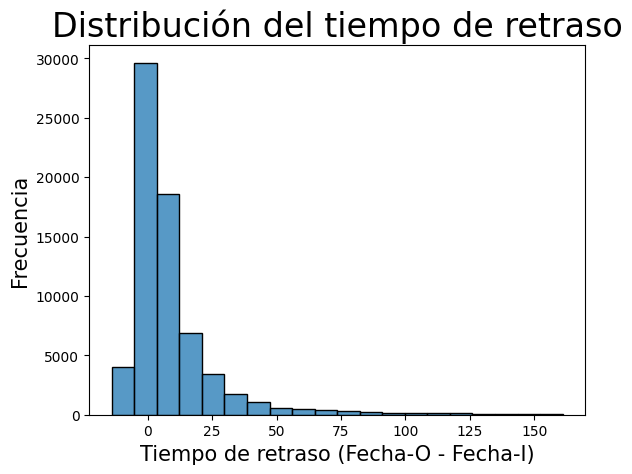

In [24]:
plt.title('Distribución del tiempo de retraso',fontsize=24)
sns.histplot(data=df_scl,x="dif_min",bins=20)
plt.ylabel("Frecuencia",fontsize=15)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

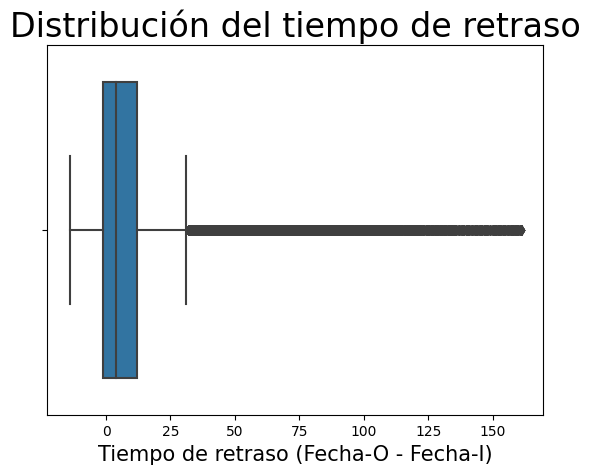

In [25]:
plt.title('Distribución del tiempo de retraso',fontsize=24)
sns.boxplot(df_scl.dif_min)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

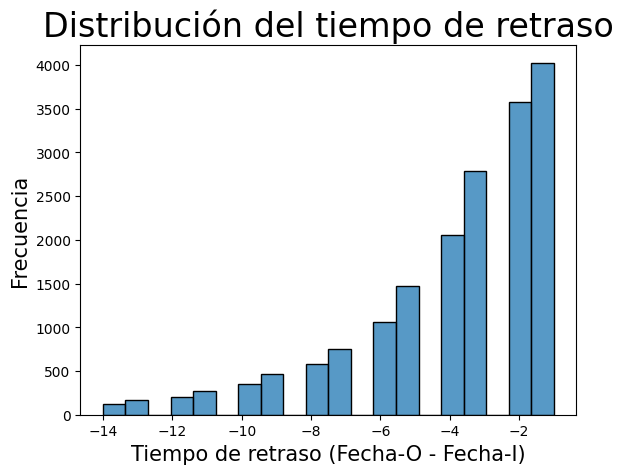

In [29]:
plt.title('Distribución del tiempo de retraso',fontsize=24)
resume = df_scl[df_scl["dif_min"]<0]
sns.histplot(data=resume,x="dif_min",bins=20)
plt.ylabel("Frecuencia",fontsize=15)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

## Observaciones:
- Existen datos negativos, esto quiere decir que el vuelo salió antes de la hora programada.
- Existe una asimetría hacia la derecha, lo cual existen vuelos con bastante retraso.
- Presencia de datos atípicos.
- No existe una gran diferencia de tiempo de aquellos vuelos que salieron antes de la hora programada.

### Calculo de datos atípicos

In [30]:
outliers, not_outliers = get_outliers(df_scl.dif_min)

In [31]:
print(f"Cantidad de datos outliers: {outliers.shape[0]}")
print(f"Cantidad de datos no outliers: {not_outliers.shape[0]}")

Cantidad de datos outliers: 5198
Cantidad de datos no outliers: 63008


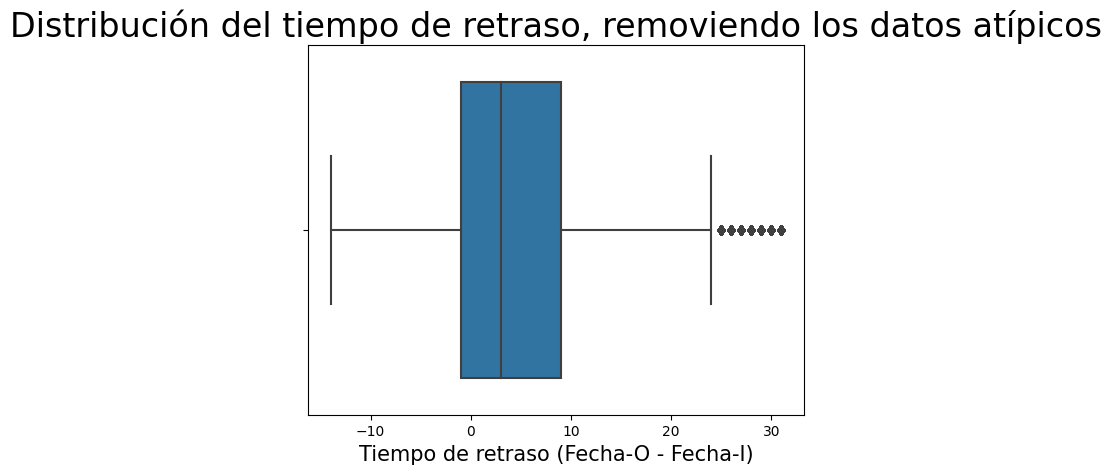

In [36]:
plt.title('Distribución del tiempo de retraso, removiendo los datos atípicos',fontsize=24)
ax = sns.boxplot(not_outliers)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

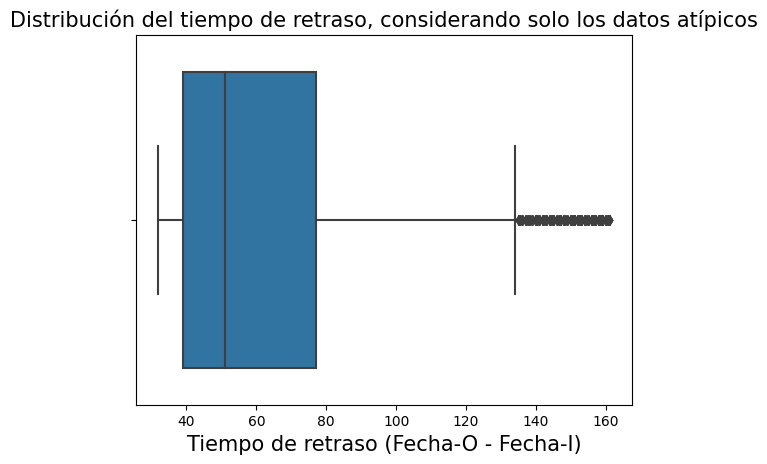

In [34]:
plt.title('Distribución del tiempo de retraso, considerando solo los datos atípicos',fontsize=15)
sns.boxplot(outliers)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

In [42]:
df_scl[df_scl["dif_min"]<0].shape

(17910, 23)

In [47]:
df_scl[df_scl["dif_min"]>=min(outliers)].shape[0]

5198

In [55]:
shapiro(df_scl["dif_min"])

ShapiroResult(statistic=0.6495827436447144, pvalue=0.0)

In [54]:
shapiro(not_outliers)

ShapiroResult(statistic=0.9482958912849426, pvalue=0.0)

## Observaciones
Se calcularon los datos atípicos y según su distribución todos aquellos vuelos con un retraso mayor a 31 minutos son considerados datos atípicos.
Se tienen 17910 vuelos que salieron antes de su hora programdo. Además, se tienen 5198 vuelos que son considerados outliers, esto quiere decir, que tuvieron un retraso de al menos 31 minutos.

Los datos no siguen una distribución normal, tanto para los datos con outliers, cómo para los datos sin los outliers. Por lo tanto, se debe considerar un modelo que no requiera el supuesto de normalidad de los datos.

In [56]:
resume_col(df=df_scl,col="atraso_15")

,atraso_15,CONTEO,PORCENTAJE
0,0,55592,81.506%
1,1,12614,18.494%


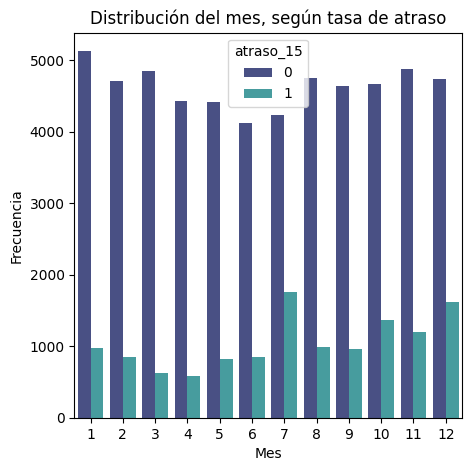

In [57]:
plt.figure(figsize=(5,5))
plt.title("Distribución del mes, según tasa de atraso")
ax = sns.countplot("MES",hue="atraso_15",data=df_scl,palette="mako")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.show()

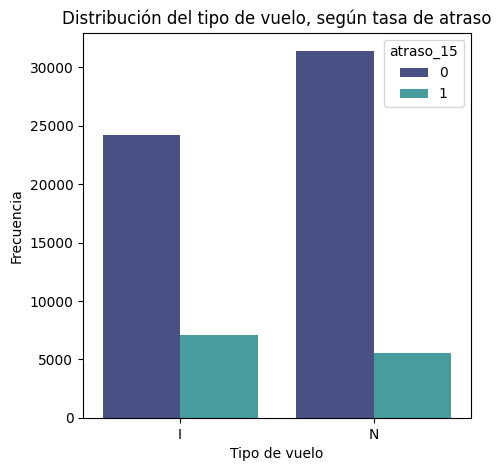

In [58]:
plt.figure(figsize=(5,5))
plt.title("Distribución del tipo de vuelo, según tasa de atraso")
ax = sns.countplot("TIPOVUELO",hue="atraso_15",data=df_scl,palette="mako")
plt.ylabel("Frecuencia")
plt.xlabel("Tipo de vuelo")
plt.show()

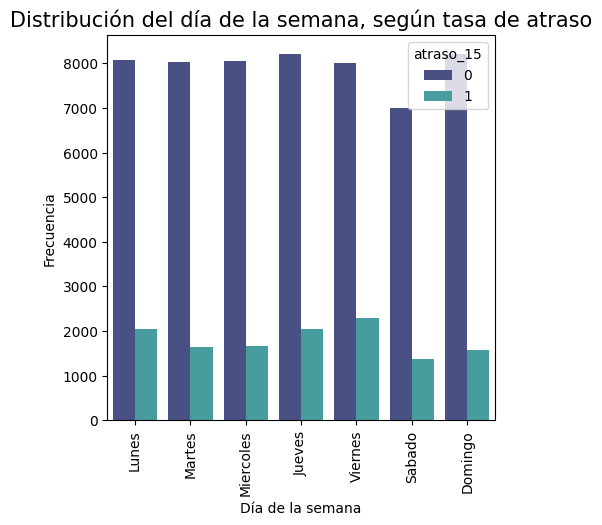

In [59]:
plt.figure(figsize=(5,5))
plt.title("Distribución del día de la semana, según tasa de atraso",fontsize=15)
ax = sns.countplot("DIANOM",hue="atraso_15",data=df_scl,palette="mako",order=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.ylabel("Frecuencia")
plt.xlabel("Día de la semana")
plt.show()

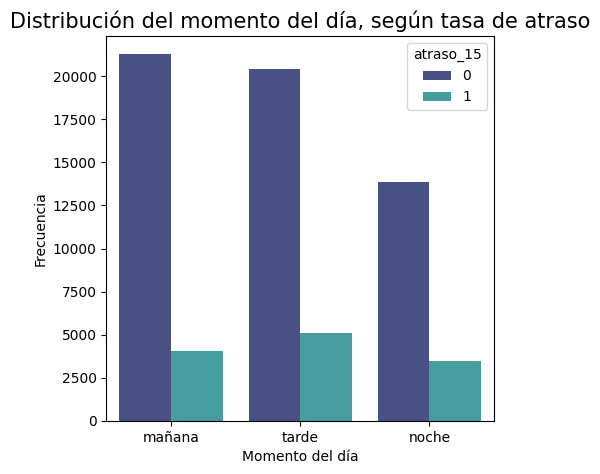

In [60]:
plt.figure(figsize=(5,5))
plt.title("Distribución del momento del día, según tasa de atraso",fontsize=15)
ax = sns.countplot("periodo_dia",hue="atraso_15",data=df_scl,palette="mako",order=["mañana","tarde","noche"])
plt.ylabel("Frecuencia")
plt.xlabel("Momento del día")
plt.show()

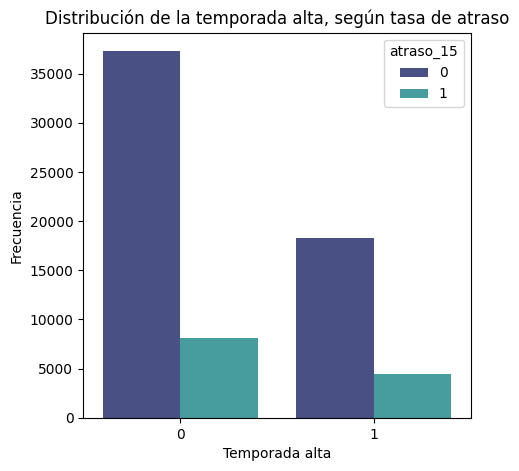

In [73]:
plt.figure(figsize=(5,5))
plt.title("Distribución de la temporada alta, según tasa de atraso")
ax = sns.countplot("temporada_alta",hue="atraso_15",data=df_scl,palette="mako")
plt.xlabel("Temporada alta")
plt.ylabel("Frecuencia")
plt.show()

### Observaciones
Se dispone de la variable objetivo cómo que ha tenido un retraso de 15 minutos o no (1 o 0). Los datos se encuentran desbalanceados de 81.5% para el 0 (que no tuvo retraso el vuelo) y 18.5% para el 1 (que obtuvo un retraso de al menos 15 minutos).

De las gráficas anteriores se concluye:
- Los meses de Julio y Diciembre son los meses que los vuelos más atrasos presentan. Sin embargo, la mayor tasa de atrasos se presentan en Julio.
- Los vuelos internacionales presentan una mayor tasa de atraso por sobre los nacionales (considerando que los viajes nacionales son más que los viajes internacionales).
- El día con mayor retraso se presenta el día viernes.
- El momento del día con mayor tasa de atraso se encuentra en la tarde (entre las 12:00 hrs y las 18:59 hrs).

In [61]:
pwd

'/Users/mario.guzman/Desktop/Globant/fit/LATAM/challenge_ds_latam'

In [64]:
df_scl.to_csv(path_save_synthetic_features,index=0)

In [68]:
df = pd.read_csv(path_save_synthetic_features)

# Preprocesamiento de datos
- La variable objetivo es **atraso_15**
- Las variables explicativas son: 
    - **DIANOM**
    - **TIPOVUELO**
    - **periodo_dia**
    - **temporada_alta**
    - **SIGLADES**
Las variables explicativas se aplicará un OneHotEncoder para llevar las variables a dummy.
# Modelado
Se construirá un modelo que prediga si un vuelo tendrá retraso de al menos 15 minutos.

In [72]:
df.head()

,FECHA_I,VLO_I,ORI_I,DES_I,EMP_I,FECHA_O,VLO_O,ORI_O,DES_O,EMP_O,DIA,MES,YEAR,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,temporada_alta,date_fmt,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0,1,2017-01-01,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0,1,2017-01-02,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0,1,2017-01-03,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0,1,2017-01-04,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0,1,2017-01-05,0,noche


In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [113]:
features = ["DIANOM","TIPOVUELO","periodo_dia","temporada_alta","SIGLADES"]
target = "atraso_15"
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=666,stratify=y)

In [114]:
ohe = OneHotEncoder()
ohe.fit(X_train)

OneHotEncoder()

In [115]:
ohe.categories_

[array(['Domingo', 'Jueves', 'Lunes', 'Martes', 'Miercoles', 'Sabado',
        'Viernes'], dtype=object),
 array(['I', 'N'], dtype=object),
 array(['mañana', 'noche', 'tarde'], dtype=object),
 array([0, 1]),
 array(['Antofagasta', 'Arica', 'Asuncion', 'Atlanta', 'Auckland N.Z.',
        'Balmaceda', 'Bariloche', 'Bogota', 'Buenos Aires', 'Calama',
        'Cancun', 'Castro (Chiloe)', 'Cataratas Iguacu',
        'Ciudad de Mexico', 'Ciudad de Panama', 'Cochabamba', 'Concepcion',
        'Copiapo', 'Cordoba', 'Curitiba, Bra.', 'Dallas', 'Florianapolis',
        'Guayaquil', 'Houston', 'Iquique', 'Isla de Pascua', 'La Paz',
        'La Serena', 'Lima', 'Londres', 'Los Angeles', 'Madrid',
        'Melbourne', 'Mendoza', 'Miami', 'Montevideo', 'Neuquen',
        'Nueva York', 'Orlando', 'Osorno', 'Paris', 'Pisco, Peru',
        'Puerto Montt', 'Puerto Natales', 'Puerto Stanley', 'Punta Arenas',
        'Punta Cana', 'Punta del Este', 'Quito', 'Rio de Janeiro', 'Roma',
        'Rosario', 'Sa

In [116]:
X_train = ohe.transform(X_train).toarray()
X_test = ohe.transform(X_test).toarray()

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

def modeling(X_train, y_train, X_test, y_test, clf):
    """
    Fit model and Predict
    :param X_train: X matrix - train
    :param y_train: target variable - train
    :param X_test: X matrix - test
    :param y_test: target variable - test
    :param clf: classifier initialized
    :return: model, predictions
    """
    # Fit
    print(clf)
    clf.fit(X_train, y_train)
    print("train score:", clf.score(X_train, y_train))
    print("test score:", clf.score(X_test, y_test))
    y_pred = clf.predict(X_test)
    return clf, y_pred

def get_report(y_test, y_pred):
    """
    Get classification report as df & plot confusion matrix
    :param y_test: Ground truth (array)
    :param y_pred: Predictions (array)
    :return: Classification report as pd.df
    """
    metrics_res = pd.DataFrame(classification_report(y_test, y_pred, digits=5, output_dict=True)).transpose()

    fig, axes = plot_confusion_matrix(confusion_matrix(y_test, y_pred),
                                      show_absolute=True,
                                      show_normed=True,
                                      colorbar=True, class_names=np.unique([y_test, y_pred]))
    plt.show()

    return metrics_res

In [120]:
# defining parameter range
param_svm = {'C': [0.7,0.8,0.9,1,1.1],
              'gamma': ['auto'],
              'kernel': ['rbf', 'sigmoid', 'poly','linear']}
param_rf = {'n_estimators': list(range(10,101,10)),
              'criterion': ['gini','entropy'],
              'max_depth': list(range(5,11,1)),
              'min_samples_split': [20]}

param_gb = {'loss': ['deviance','exponential'],
              'n_estimators': list(range(60,101,10)),
              'subsample': [0.6,0.7,0.8,1],
              'max_depth': list(range(3,8,1))}

In [124]:
grid_under = GridSearchCV(RandomForestClassifier(), param_rf, refit = True, verbose = 1)
grid_under.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [20],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=1)

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=20)


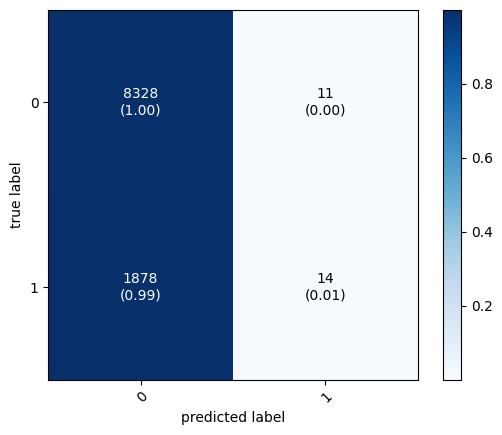


*	 Metrics 	*

              precision    recall  f1-score       support
0              0.815991  0.998681  0.898140   8339.000000
1              0.560000  0.007400  0.014606   1892.000000
accuracy       0.815365  0.815365  0.815365      0.815365
macro avg      0.687995  0.503040  0.456373  10231.000000
weighted avg   0.768651  0.815365  0.734749  10231.000000


In [130]:
print(grid_under.best_estimator_)
y_pred = grid_under.predict(X_test)
metrics_res = get_report(y_test, y_pred)
print("\n*\t Metrics \t*\n")
print(metrics_res)

In [ ]:
%%time
print("\n * \t SVM * \t \n")
grid_under = GridSearchCV(SVC(), param_svm, refit = True, verbose = 1)
grid_under.fit(X_train, y_train)
# print how our model looks after hyper-parameter tuning
print(grid_under.best_estimator_)
y_pred = grid_under.predict(X_test)
metrics_res = get_report(y_test, y_pred)
print("\n*\t Metrics \t*\n")
print(metrics_res)


 * 	 SVM * 	 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
